# **Project 3**, APS1070 Fall 2021
#### **PCA [10 marks]**
**Deadline: Nov 5th, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Manthan Patel
*   **Student number**: 1008247933



In this project we work on a Covid-19 dataset that reports the number  cases for different countries at the end of each day.

# Part 1: Getting started [1 Marks]

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)

1. Write a function to do the following: **[0.25]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.25]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.25]**

In [78]:
def Timeseries(cases_dataframe,cont_list):
  fig = plt.figure(figsize=(12,15))
  for j in range(len(cont_list)):
      plt.subplot(len(cont_list),1,j+1)
      Cont_data = np.array(cases_dataframe[cases_dataframe.index == cont_list[j]])
      plt.plot(cases_dataframe.columns.values, Cont_data.T)
      plt.title(cont_list[j])
      plt.grid()
      axs=plt.gca()
      loc = plticker.MultipleLocator(20)
      axs.xaxis.set_major_locator(loc)
      plt.xticks(rotation=270)
      plt.tight_layout()
  plt.show()

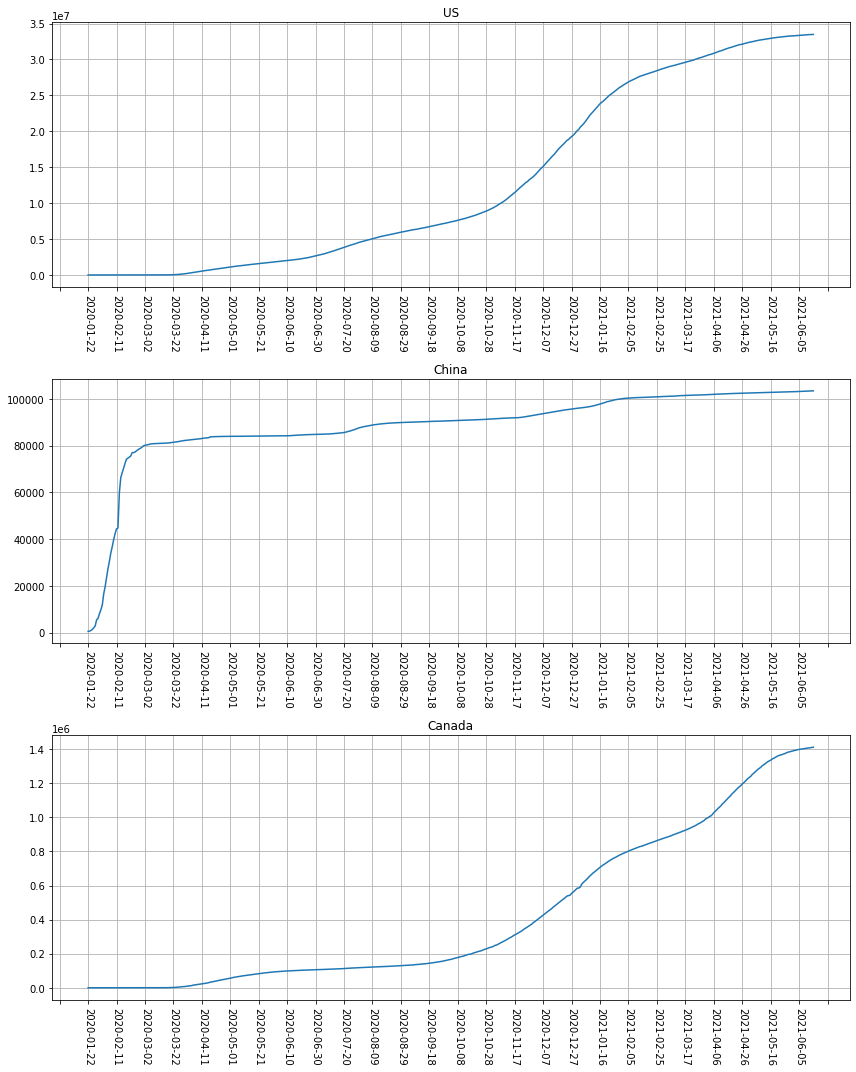

In [79]:
Plot = Timeseries(cases_raw,['US','China','Canada'])

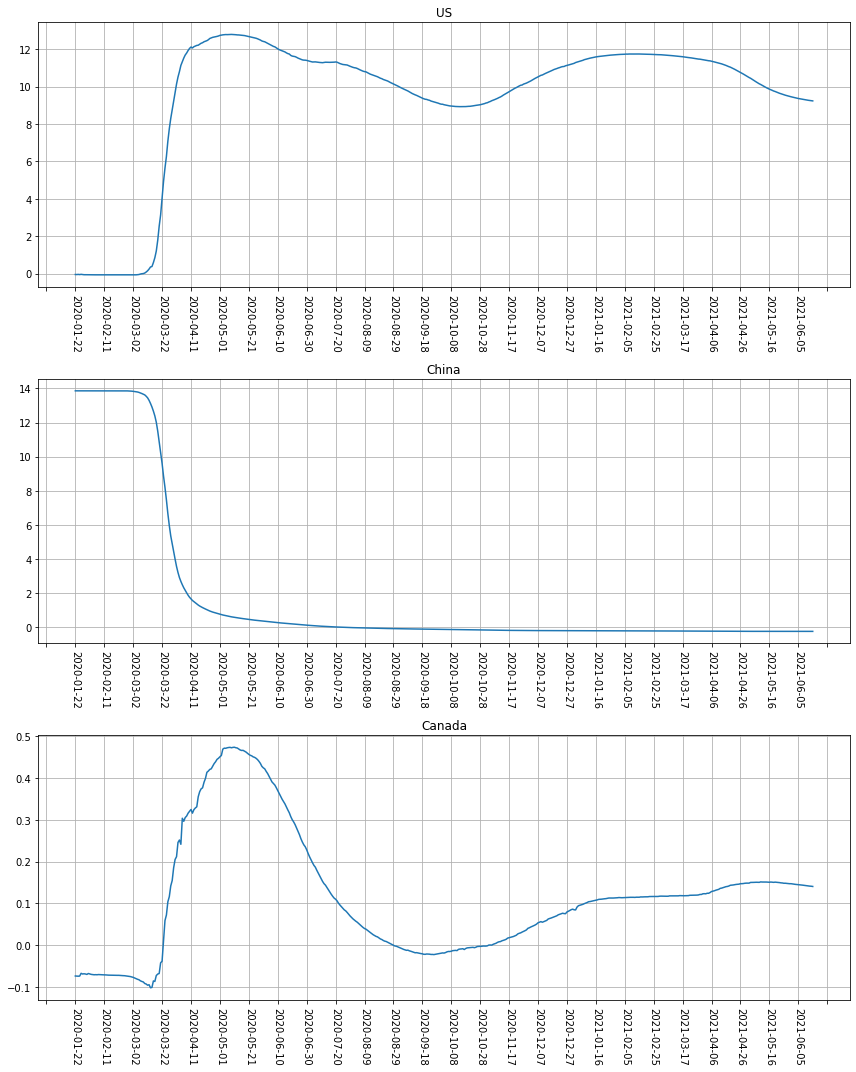

In [80]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
std_cases_raw = StandardScaler().fit_transform(cases_raw)
cases_raw_std = pd.DataFrame(std_cases_raw,columns=cases_raw.columns,index=list(cases_raw.index))

#Plotting graph for standardised data
Plot_std = Timeseries(cases_raw_std,['US','China','Canada'])

**Interpretation of Plots**


*   For US it can be observed that initially number of cases were very low as compared to later stages, in graph also it is seen that cases started to drop first, then increased then again fell down.
*   In case of China first number of cases were very high but in later stages they dropped significanlty and it can be observed in stadardsed easily.

*   Cases of Canada were low in initial stages then increased suddenly but later decreased and were growing at constant rate.

Standardisation of data will shift mean to origin and will give us covariance of 1, so negative value of standardised graph signifies that for that particular point cases are below mean value thus after standardisation it gives us negative value. It does not mean that cases number are negative.





# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (511, 511).* **[0.25]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.25]**
4. How many PCs do you need to cover 99% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [81]:
#Covariance Matrix
Cov_mat = np.cov(std_cases_raw.T)
print(Cov_mat.shape)

#Function for Eigenvectors and Eigenvalues
def get_sorted_eigen(df_cov):
    eigenValues, eigenVectors = np.linalg.eigh(df_cov) 
    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]
    return eigenValues,eigenVectors

(511, 511)


In [82]:
Func_A = get_sorted_eigen(Cov_mat)

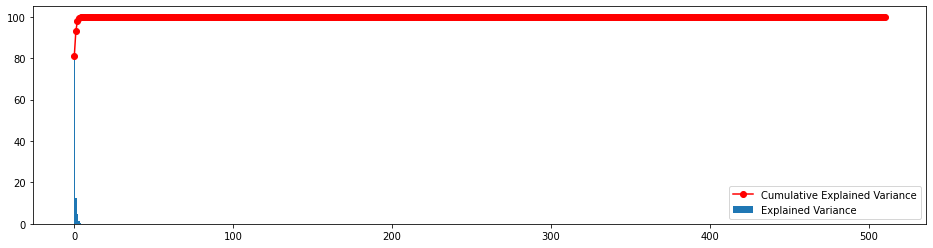

In [83]:
#Scree Plot
eigValSum = sum(Func_A[0])
expVar = [eigV/eigValSum*100 for eigV in Func_A[0]]
cumExpVar = np.cumsum(expVar)

plt.figure(figsize=(16,4))
plt.bar(range(511), expVar[:511], label='Explained Variance')
plt.plot(cumExpVar[:511], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

In [84]:
#PC Count for 99% variance
def PC_count(var):
    sum = 0
    count = 0
    for i in range(len(var)):
      sum += var[i]
      count += 1
      if sum > 99:
        break
    return count

A = PC_count(expVar)
print("Number of Principal components that cover 99% covariance are:",A)

Number of Principal components that cover 99% covariance are: 4


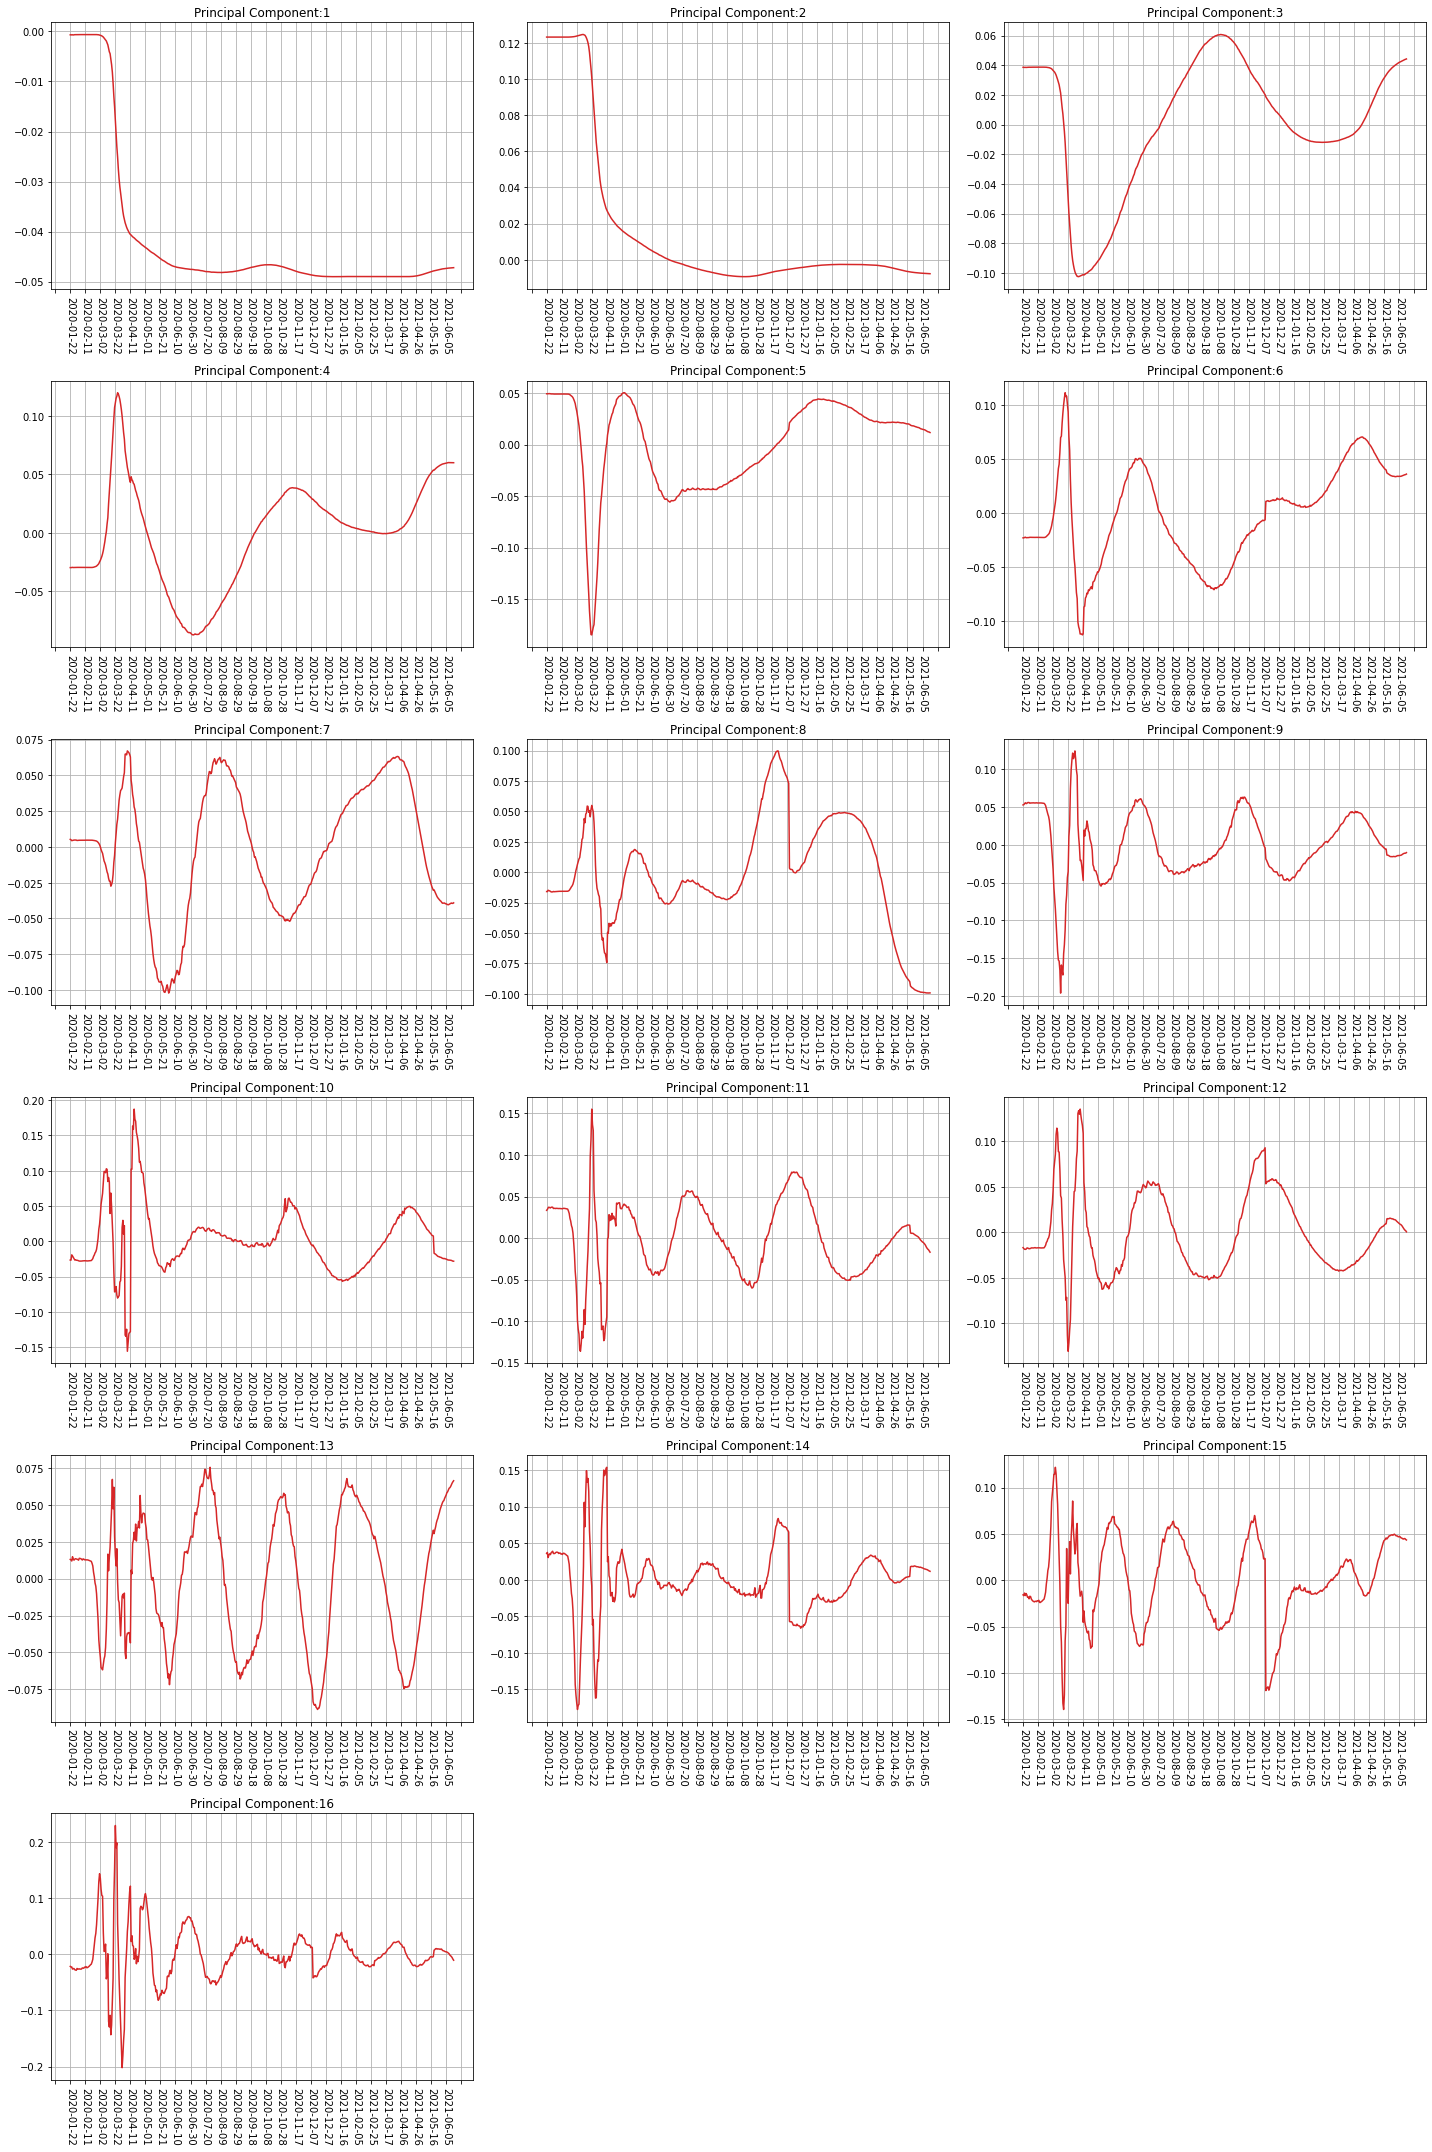

In [85]:
#Plotting frst 16 PCs
plt.figure(figsize=(20,30))
for j in range(16):
      plt.subplot(6,3,(j+1))
      #Cont_data = np.array(cases_dataframe[cases_dataframe.index == cont_list[j]])
      plt.plot(cases_raw.columns.values,Func_A[1][:,j] , color='tab:red')
      plt.title('Principal Component:%d'%(j+1))
      plt.grid()
      axs=plt.gca()
      loc = plticker.MultipleLocator(20)
      axs.xaxis.set_major_locator(loc)
      plt.xticks(rotation=270)
      plt.tight_layout()
plt.show()

**Comparison of Principal Components**



*   Principal Components covers variance across the data, so first few PC's will covers maximum of covariance among all PC's
*   If we take first 4 PC's which covers 99% of covariance of all data and compare it to rest of the PC's then we can observe that it is covering all the data which has maximum covariance.

*   We can check from Y-axis values with corresponding features(Dates) that it is comparatively larger in intial PC's then later ones. Because these recipes of PC's are covering highest covariance.
*   Remaining of Covariance it getting covered by Remaining PC's, which is less then 1% of total covariance.





# Part 3: Data reconstruction [3 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[0.5]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[0.5]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 10 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [86]:
#Function Generate
from sklearn.metrics import mean_squared_error
from math import sqrt

def plot_country_figures(original_df, country_name):
    Cont_data = np.array(original_df[original_df.index == country_name])
    Cont_data = Cont_data[0]
    plt.figure(figsize=(20,10))
    #First Plot
    plt.subplot(221)
    plt.plot(original_df.columns.values, Cont_data.T, color='tab:red') 
    plt.title('PCA-Original Time Series of Country:%s'%(country_name))
    plt.xlabel("Dates")
    plt.ylabel("Cases count")
    plt.grid()
    axs=plt.gca()
    loc = plticker.MultipleLocator(20)
    axs.xaxis.set_major_locator(loc)
    plt.xticks(rotation=270)
    plt.tight_layout()

    #eigenVlue and eigenVector calculation for standardised data
    scaler = StandardScaler()
    scaler.fit(original_df)
    std_cases_raw = scaler.transform(original_df)
    cases_raw_std = pd.DataFrame(std_cases_raw,columns=original_df.columns,index=list(original_df.index))
    Cov_mat = np.cov(std_cases_raw.T)
    eigenValues, eigenVectors = np.linalg.eigh(Cov_mat) 
    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]

    #Creating reconstruction
    #Second Plot
    rangelist = [1,2,4,8,16]
    plt.subplot(222)
    for k in (rangelist):
        P = np.dot(std_cases_raw, eigenVectors[:, :k])
        R = np.dot(P,eigenVectors[:, :k].T)
        scaler1 = StandardScaler()
        scaler1.fit(original_df)
        data1 =  scaler1.inverse_transform(R)
        new_df = pd.DataFrame(data1,columns=original_df.columns,index=list(original_df.index))
        Country = np.array(new_df[new_df.index == country_name])
        plt.plot(original_df.columns.values, Country.T,label='Reconstruction using %d PC'%k)
        plt.title('Reconstructed Time Series of Country:%s'%(country_name))
        plt.xlabel("Dates")
        plt.ylabel("Cases count")
        plt.legend()
        plt.grid()
        axs=plt.gca()
        loc = plticker.MultipleLocator(20)
        axs.xaxis.set_major_locator(loc)
        plt.xticks(rotation=270)
    plt.tight_layout()
        
    #Residual Error
    #Third Plot
    plt.subplot(223)
    for c in (rangelist):
        Proj = np.dot(std_cases_raw, eigenVectors[:, :c])
        Reconst = np.dot(Proj,eigenVectors[:, :c].T)
        scaler2 = StandardScaler()
        scaler2.fit(original_df)
        data2 =  scaler2.inverse_transform(Reconst)
        new_df1 = pd.DataFrame(data2,columns=original_df.columns,index=list(original_df.index))
        Residual_error = np.array(original_df[original_df.index == country_name] - new_df1[new_df1.index == country_name])
        plt.plot(original_df.columns.values, Residual_error.T,label='Residual Error of %d PC'%c)
        plt.title('Residual Error of Country:%s'%(country_name))
        plt.xlabel("Dates")
        plt.ylabel("Residual Error")
        plt.legend()
        plt.grid()
        axs=plt.gca()
        loc = plticker.MultipleLocator(20)
        axs.xaxis.set_major_locator(loc)
        plt.xticks(rotation=270)
    plt.tight_layout()

    #RMSE Calculation
    #Fourth Plot
    RMSE_list = []
    Component_list = []
    plt.subplot(224)
    for i in range(1,11):
        Projection = np.dot(std_cases_raw, eigenVectors[:, :i])
        Reconstruction = np.dot(Projection,eigenVectors[:, :i].T)
        scaler1 = StandardScaler()
        scaler1.fit(original_df)
        data3 =  scaler1.inverse_transform(Reconstruction)
        predicted_df = pd.DataFrame(data3,columns=original_df.columns,index=list(original_df.index))
        mse = sqrt(mean_squared_error(original_df[original_df.index == country_name], predicted_df[predicted_df.index == country_name]))
        RMSE_list.append(mse)
        Component_list.append(i)
    plt.plot(range(1,11),RMSE_list)
    plt.title('Root Mean Squared Error of Country:%s'%(country_name))
    plt.xlabel("No of Components")
    plt.ylabel("RMSE")
    plt.grid()
    plt.tight_layout()
    plt.show()   

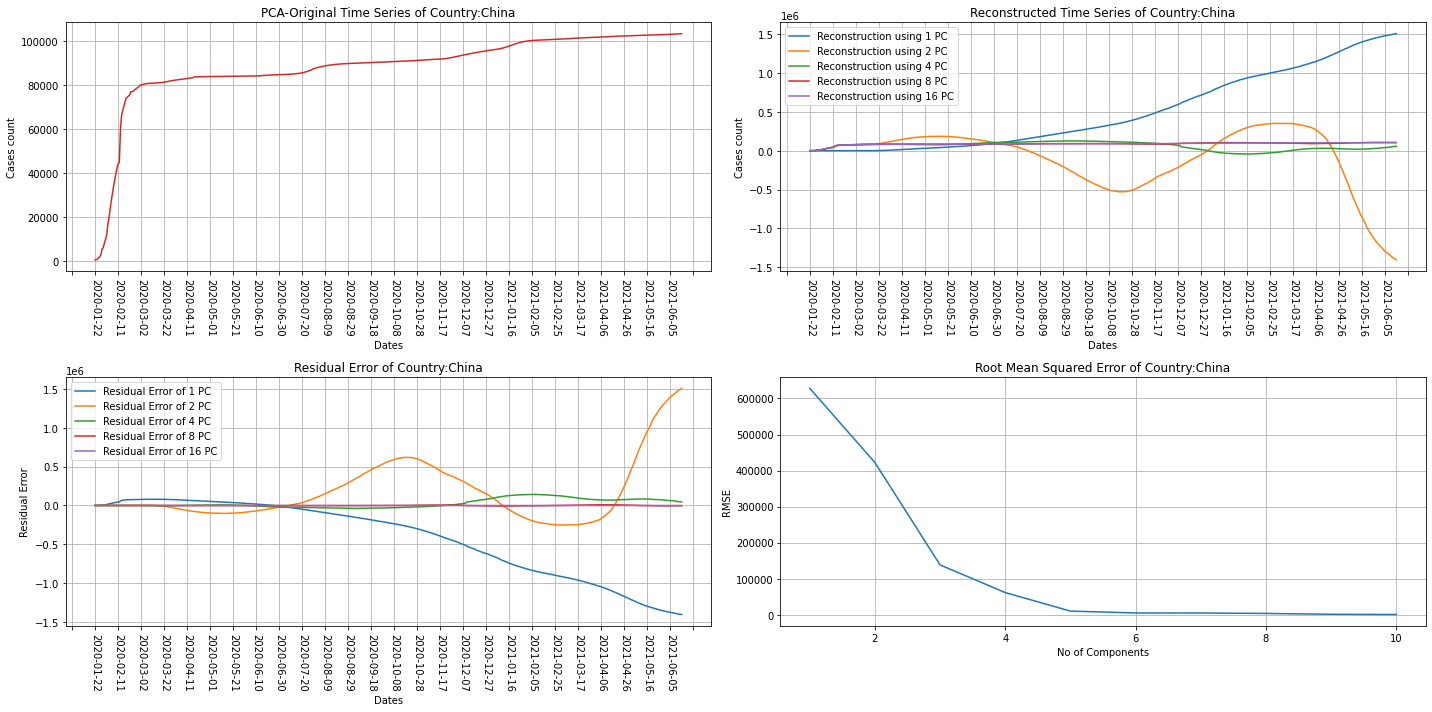

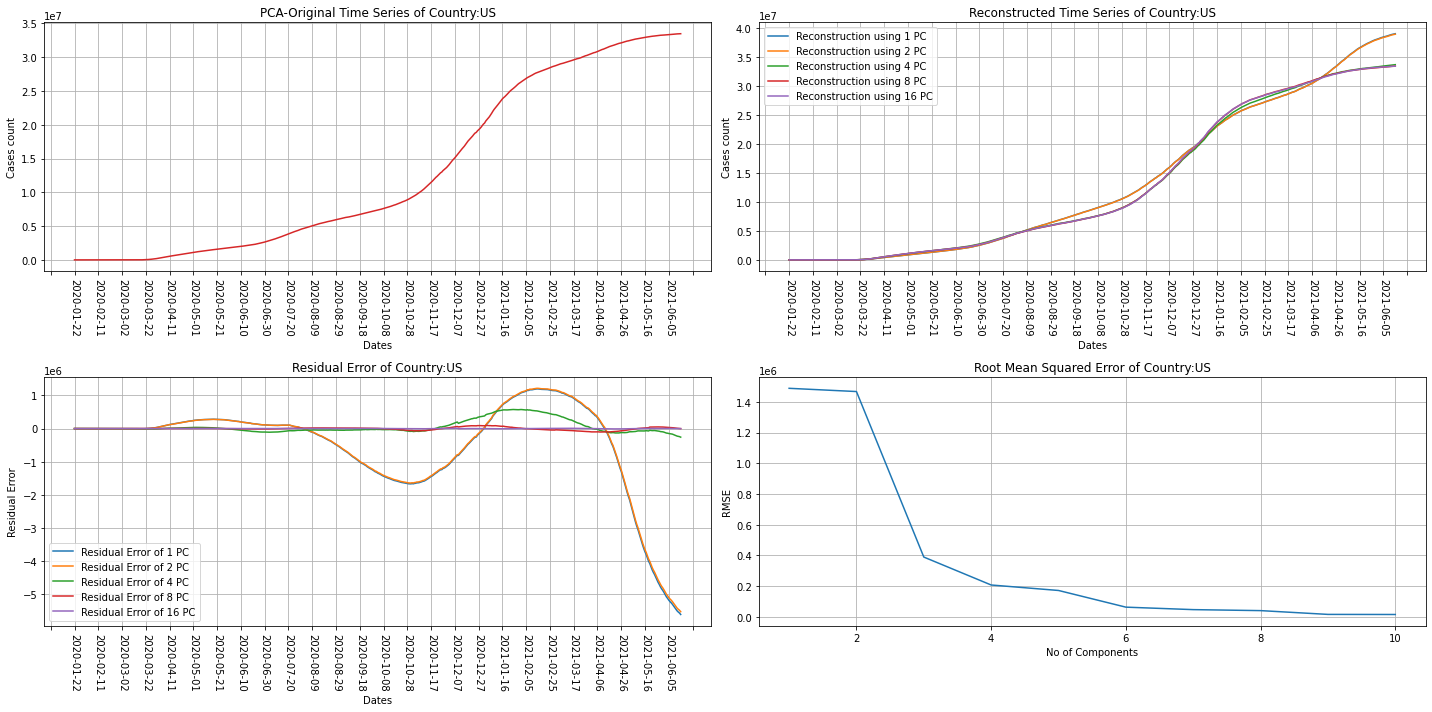

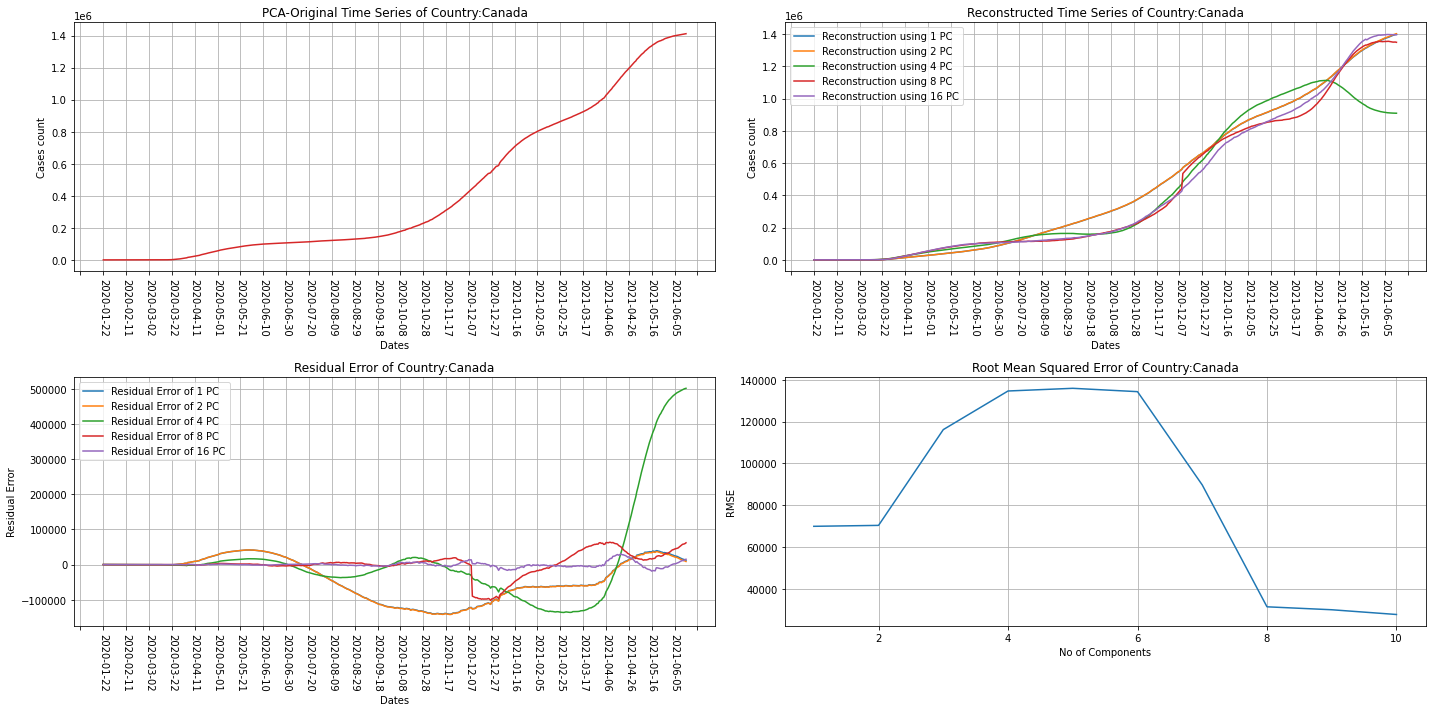

In [87]:
Q = plot_country_figures(cases_raw,'China')
W = plot_country_figures(cases_raw,'US')
E = plot_country_figures(cases_raw,'Canada')

**Plot Interpretation**


*   From plots we can observe that Reconstruction plots are nearly same as Original Plots.
*   For all 3 conutries Residual error was decreasing with increasing numbers of Principal Components.

*   RMSE is decreasing with increasing no. of Components

# Part 4: SVD [2 Marks]
Modify your code in part 3 to use SVD instead of PCA for extracting the eigenvectors. **[1]**

Explain if standardization or covariance computation is required for this part.
Repeat part 3 and compare your PCA and SVD results. **[1]**



In [88]:
#Function Generate
from sklearn.metrics import mean_squared_error
from math import sqrt

def plot_country_figures_SVD(original_df, country_name):
    Cont_data = np.array(original_df[original_df.index == country_name])

    #First Plot
    plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.plot(original_df.columns.values, Cont_data.T, color='tab:red') 
    plt.title('SVD-Original Time Series of Country:%s'%(country_name))
    plt.xlabel("Dates")
    plt.ylabel("Cases count")
    plt.grid()
    axs=plt.gca()
    loc = plticker.MultipleLocator(20)
    axs.xaxis.set_major_locator(loc)
    plt.xticks(rotation=270)
    plt.tight_layout() 

    #Computing SVD matrix
    data = np.array(original_df)
    U, S, V = np.linalg.svd(data)

    #Creating reconstruction
    rangelist = [1,2,4,8,16]
    plt.subplot(222)
    for k in (rangelist):
        data1 = S[0:k]*U[:,0:k]@V[0:k,:]
        new_df = pd.DataFrame(data1,columns=original_df.columns,index=list(original_df.index))
        Country = np.array(new_df[new_df.index == country_name])
        plt.plot(original_df.columns.values, Country.T,label='Reconstruction using %d PC'%k)
        plt.title('Reconstructed Time Series of Country:%s'%(country_name))
        plt.xlabel("Dates")
        plt.ylabel("Cases count")
        plt.legend()
        plt.grid()
        axs=plt.gca()
        loc = plticker.MultipleLocator(20)
        axs.xaxis.set_major_locator(loc)
        plt.xticks(rotation=270)
    plt.tight_layout()

    #Residual Error
    plt.subplot(223)
    for c in (rangelist):
        data2 =  S[0:c]*U[:,0:c]@V[0:c,:]
        new_df1 = pd.DataFrame(data2,columns=original_df.columns,index=list(original_df.index))
        Residual_error = np.array(original_df[original_df.index == country_name] - new_df1[new_df1.index == country_name])
        plt.plot(original_df.columns.values, Residual_error.T,label='Residual Error of %d PC'%c)
        plt.title('Residual Error of Country:%s'%(country_name))
        plt.xlabel("Dates")
        plt.ylabel("Residual Error")
        plt.legend()
        plt.grid()
        axs=plt.gca()
        loc = plticker.MultipleLocator(20)
        axs.xaxis.set_major_locator(loc)
        plt.xticks(rotation=270)
    plt.tight_layout()

    #RMSE
    RMSE_list = []
    Component_list = []
    plt.subplot(224)
    for i in range(1,11):
        data3 =  S[0:i]*U[:,0:i]@V[0:i,:]
        predicted_df = pd.DataFrame(data3,columns=original_df.columns,index=list(original_df.index))
        mse = sqrt(mean_squared_error(original_df[original_df.index == country_name], predicted_df[predicted_df.index == country_name]))
        RMSE_list.append(mse)
        Component_list.append(i)
    plt.plot(range(1,11),RMSE_list)
    plt.title('Root Mean Squared Error of Country:%s'%(country_name))
    plt.xlabel("No of Components")
    plt.ylabel("RMSE")
    plt.grid()
    plt.tight_layout()
    plt.show()

**Standardization and Covariance Computation**


*   For Singular Value Decomposition we do not neccessorily need to compute covariance matrix and data standardisation as we directly get Singular value matrix from SVD matrix computation.
*   In case of PCA we need to find eigenvalues and eigenvector from Covariance matrix that is why we need Standardised data, while in case of SVD it is not neccessory.



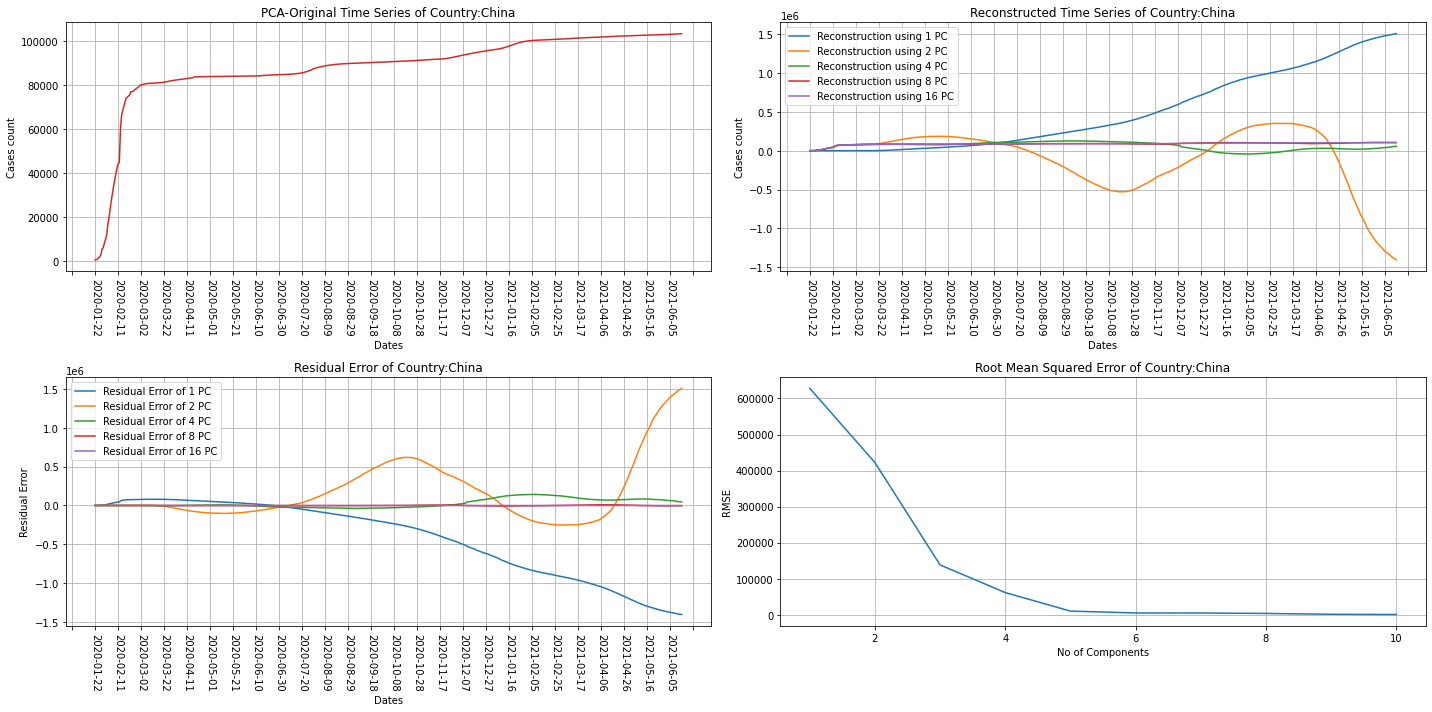

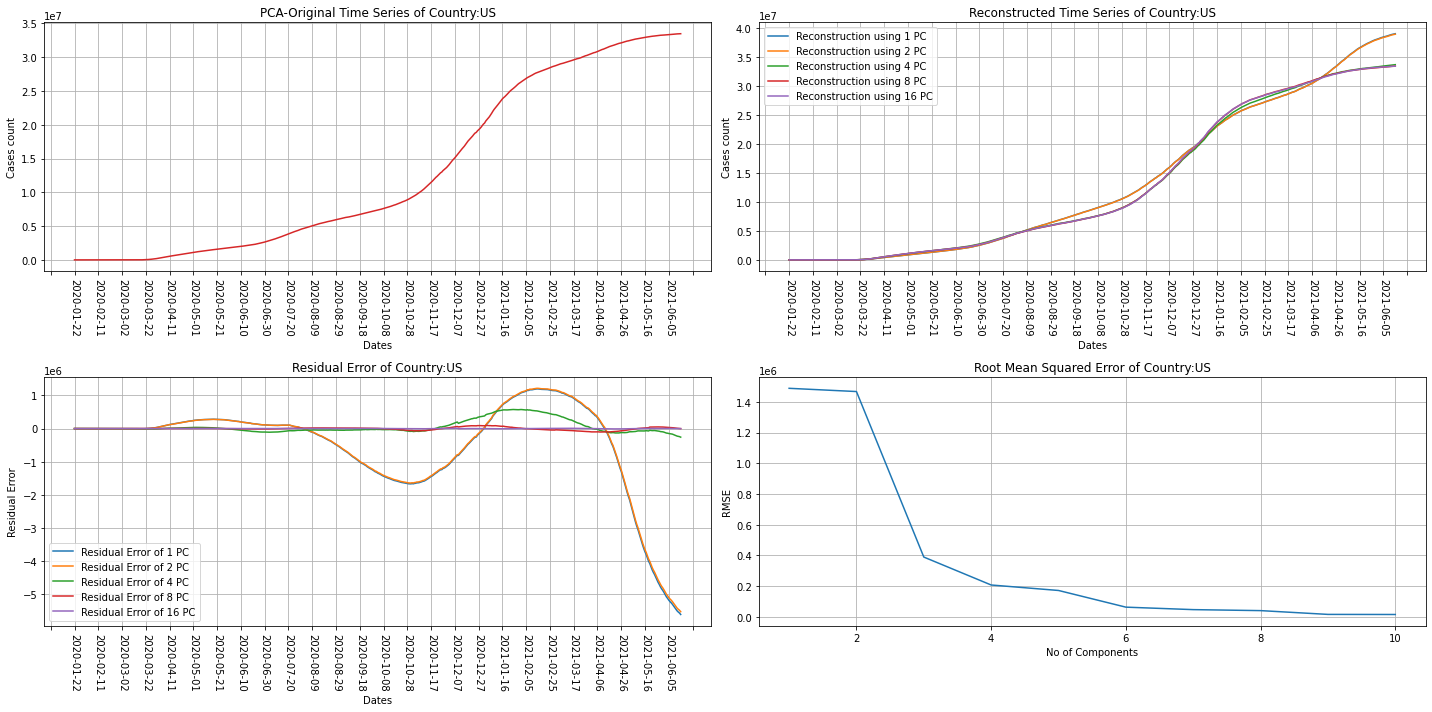

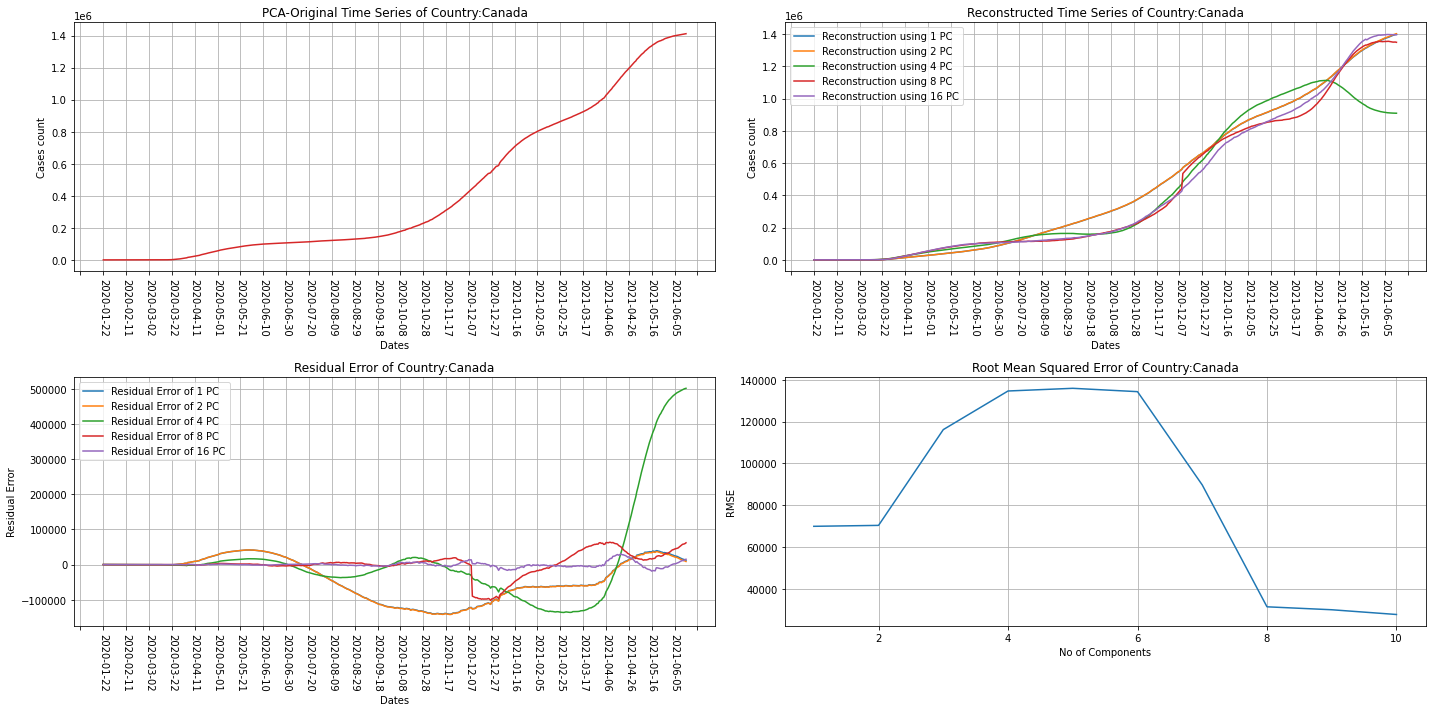

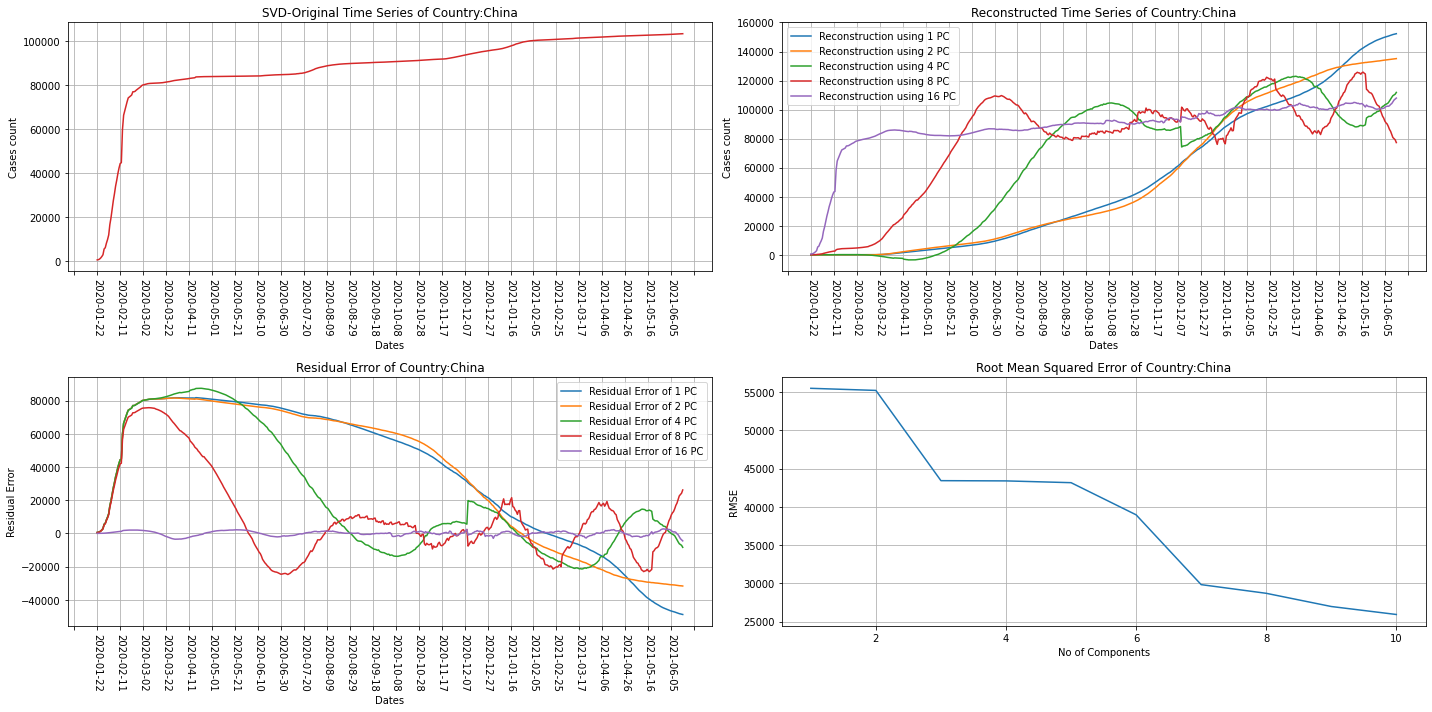

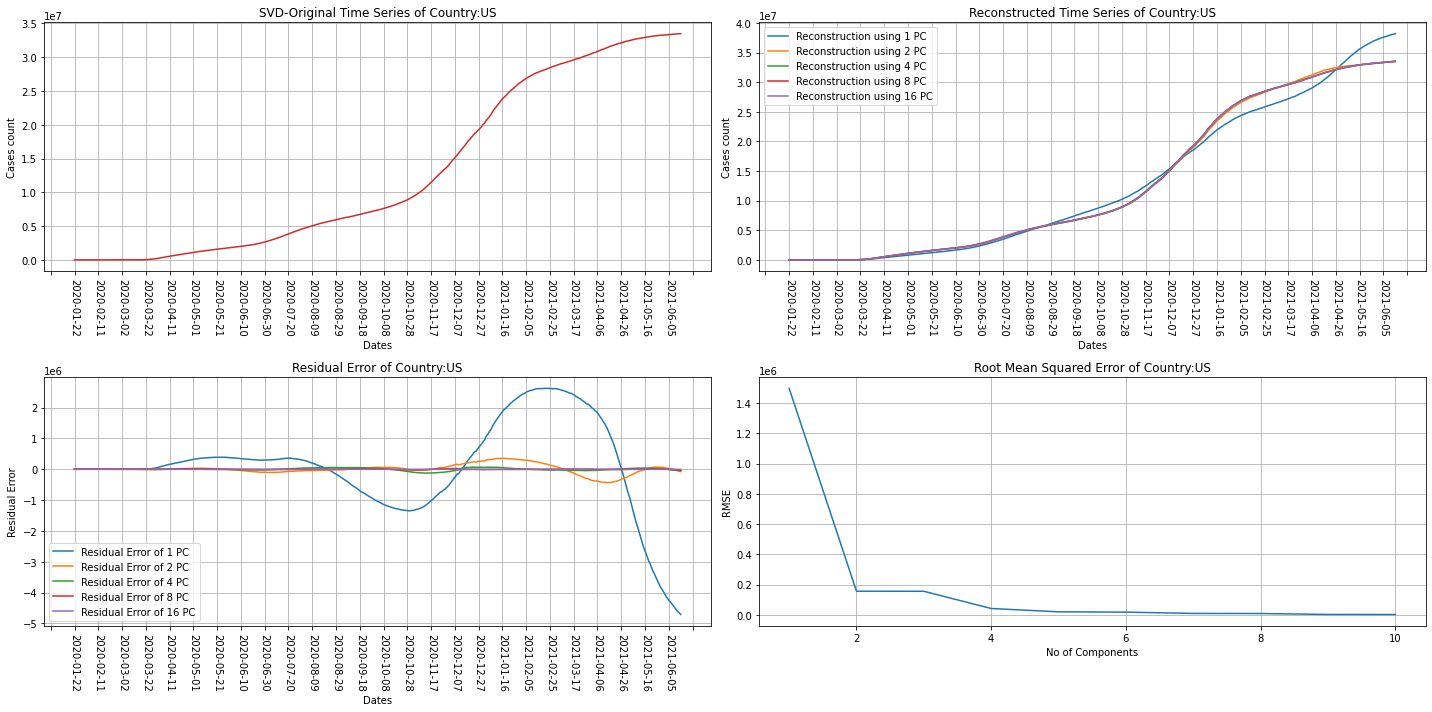

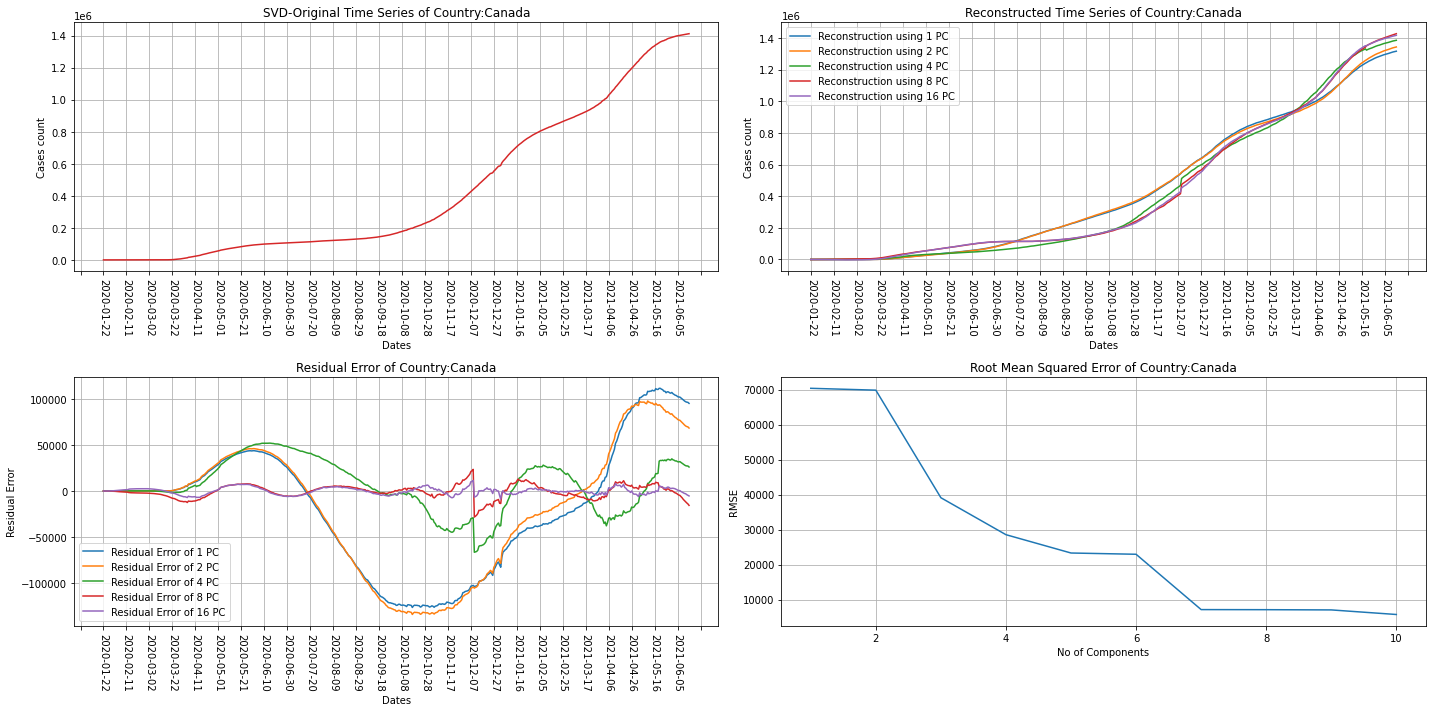

In [89]:
#Plotting PCA for China,US and Canada
Q = plot_country_figures(cases_raw,'China')
W = plot_country_figures(cases_raw,'US')
E = plot_country_figures(cases_raw,'Canada')

#Plotting SVD for China,US and Canada
X = plot_country_figures_SVD(cases_raw,'China')
Y = plot_country_figures_SVD(cases_raw,'US')
Z = plot_country_figures_SVD(cases_raw,'Canada')

**Result Comparison**


*   Reconstruction of projected data in SVD is more accurate than PCA is evident from Plots.
*   Residual Error is more in case of PCA than SVD for all 3 Countries.
*   RMSE is much more smaller in case of SVD than PCA which can be observed from plots.
*   Overall SVD does dimentionality reduction much more accurately than PCA as data loss very less data even after reducing dimensions than PCA.





# Part 5: Let's collect a more recent dataset! [2 Marks]
Create a more recent dataset similar to the one provided in your handout using the raw information provided [here](https://datahub.io/core/covid-19#resource-time-series-19-covid-combined). **[1]**

You need to manipulate the data to organize it in the desired format. You are free to use any tools you like, from Excel to Python!
 
In the end, you should have a new CSV file with more dates (features) compared to the provided dataset. 


Upload your new dataset (in CSV format) to your colab notebook and repeat part 4. **[1]**


Don't forget to add your new CSV file to your GitHub repo. The code below helps you to upload your new CSV file to your colab session. 




In [90]:
#Collecting dataset
from google.colab import files
uploaded = files.upload()

Saving countries-aggregated_csv (1).csv to countries-aggregated_csv (1) (2).csv


In [97]:
import io
d1=pd.read_csv(io.BytesIO(uploaded['countries-aggregated_csv (1).csv']))
d1=d1.drop(d1.columns[[3,4]],axis=1)
d1

,Date,Country,Confirmed
0,2020-01-22,Afghanistan,0
1,2020-01-23,Afghanistan,0
2,2020-01-24,Afghanistan,0
3,2020-01-25,Afghanistan,0
4,2020-01-26,Afghanistan,0
...,...,...,...
127395,2021-10-28,Zimbabwe,132880
127396,2021-10-29,Zimbabwe,132926
127397,2021-10-30,Zimbabwe,132926
127398,2021-10-31,Zimbabwe,132977


In [98]:
d2 = d1.pivot(index='Country', columns='Date', values='Confirmed')
d2

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-09-23,2021-09-24,2021-09-25,2021-09-26,2021-09-27,2021-09-28,2021-09-29,2021-09-30,2021-10-01,2021-10-02,2021-10-03,2021-10-04,2021-10-05,2021-10-06,2021-10-07,2021-10-08,2021-10-09,2021-10-10,2021-10-11,2021-10-12,2021-10-13,2021-10-14,2021-10-15,2021-10-16,2021-10-17,2021-10-18,2021-10-19,2021-10-20,2021-10-21,2021-10-22,2021-10-23,2021-10-24,2021-10-25,2021-10-26,2021-10-27,2021-10-28,2021-10-29,2021-10-30,2021-10-31,2021-11-01
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,154800,154960,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,165864,166690,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,202283,202449,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15156,15167,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,53840,54280,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,728435,736972,746678,756689,766051,770640,779398,790755,797712,803202,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,392452,394683,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8830,8861,8891,8934,8988,9016,9039,9067,9

In [94]:
#Saving File as CSV
d2.to_csv('Recentdataset.csv',index=True)

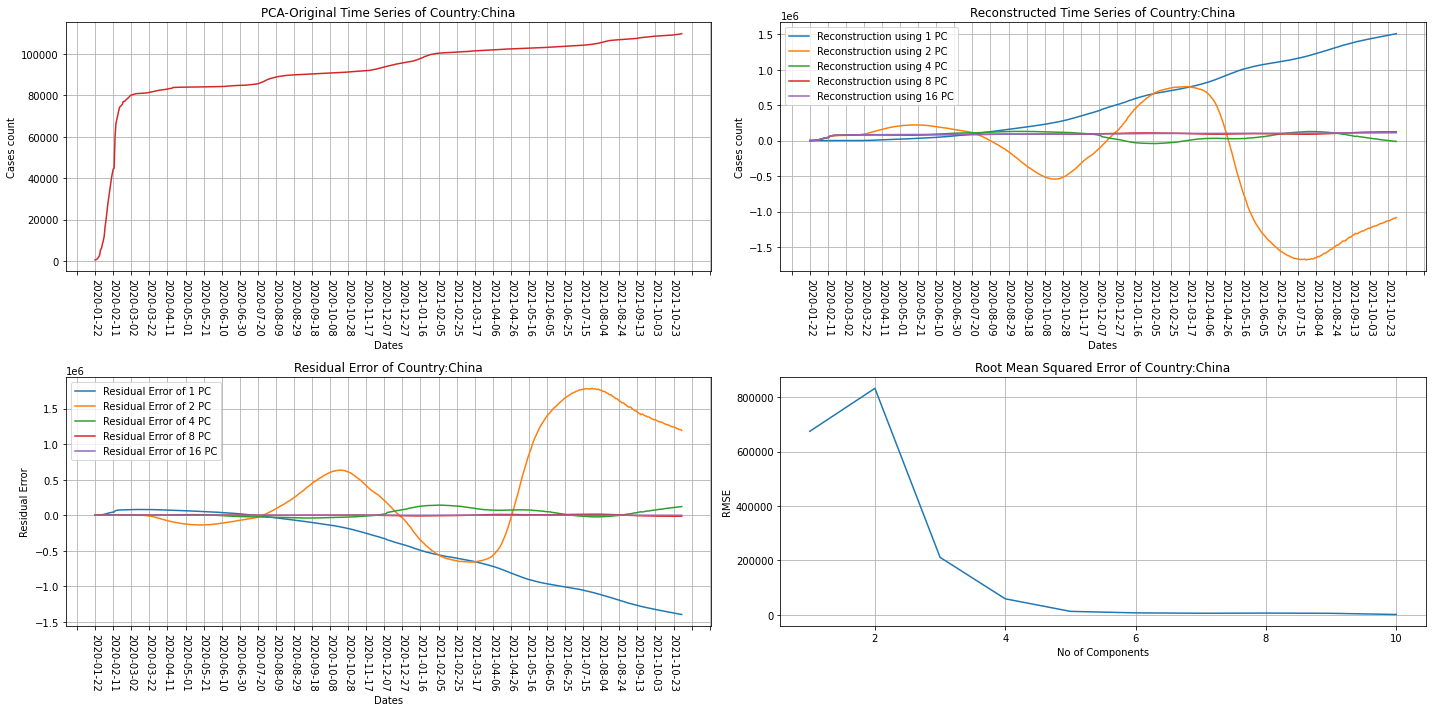

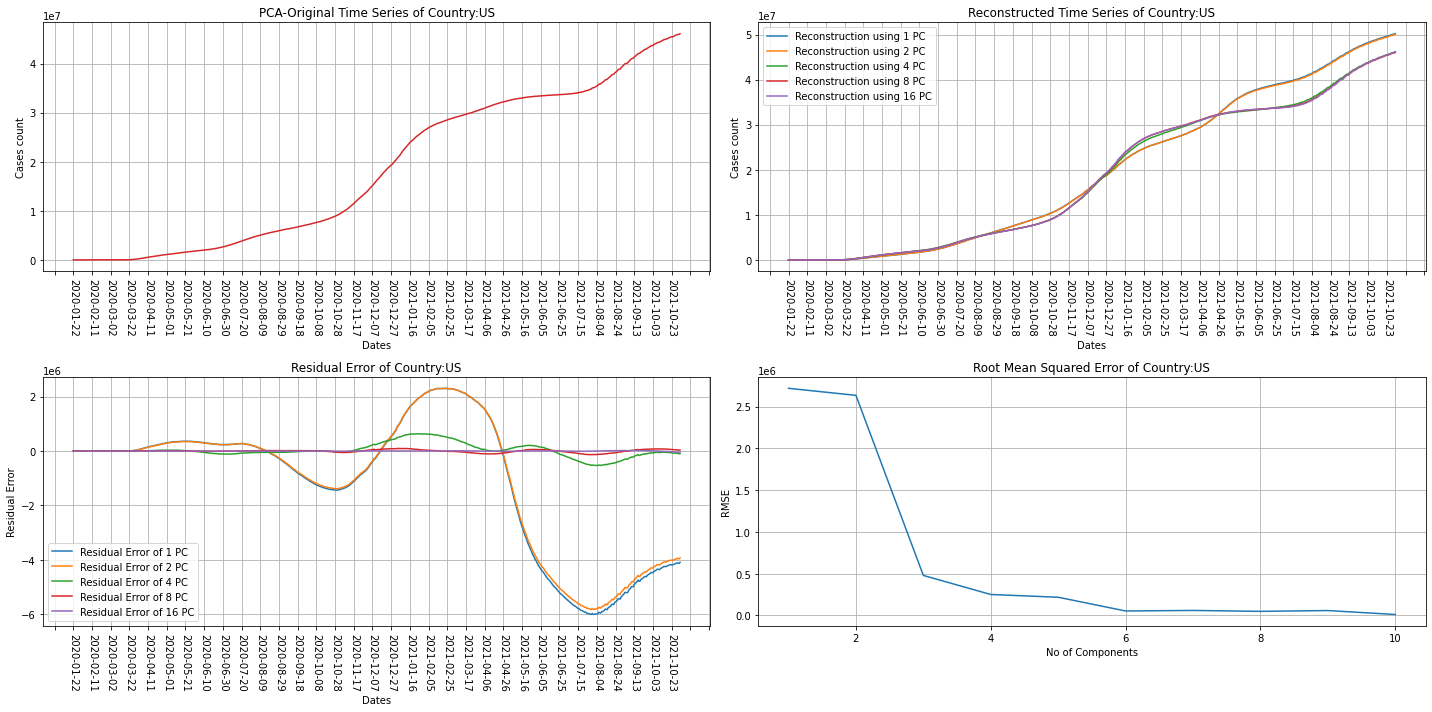

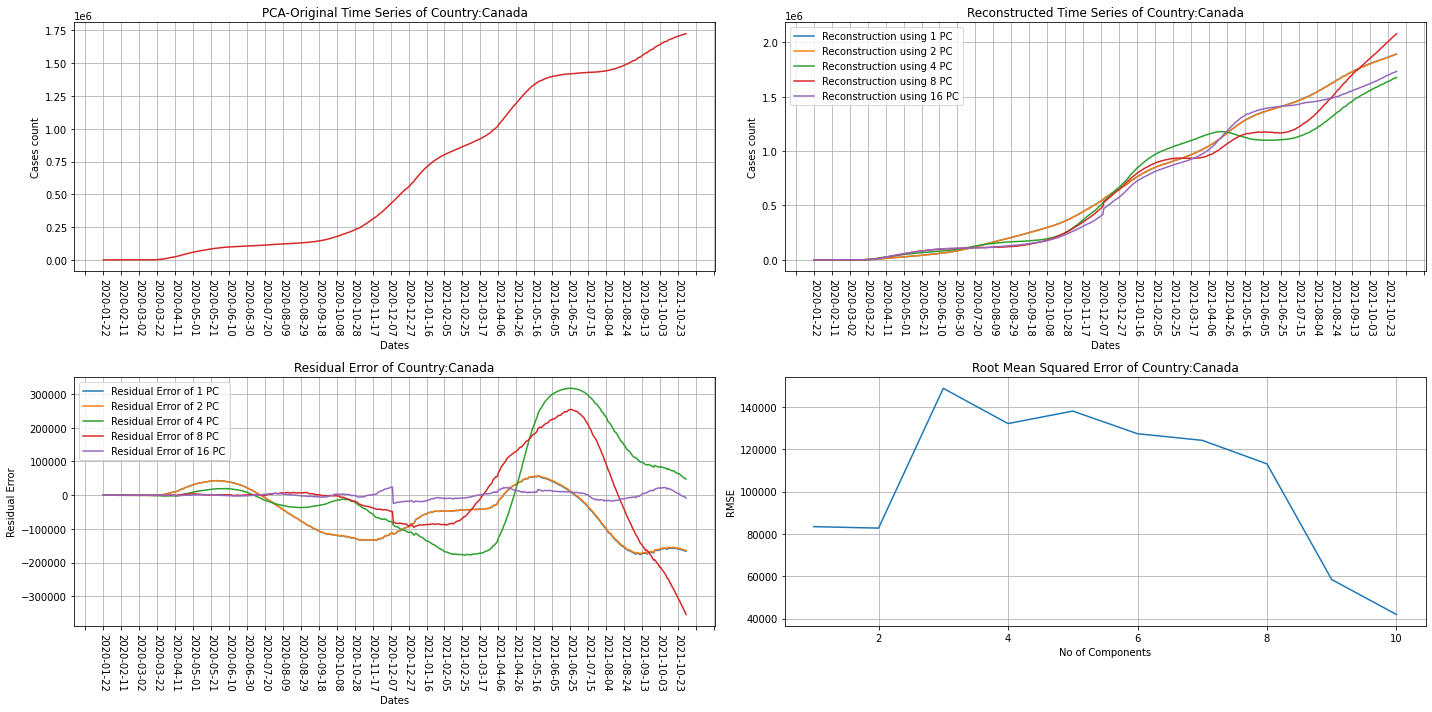

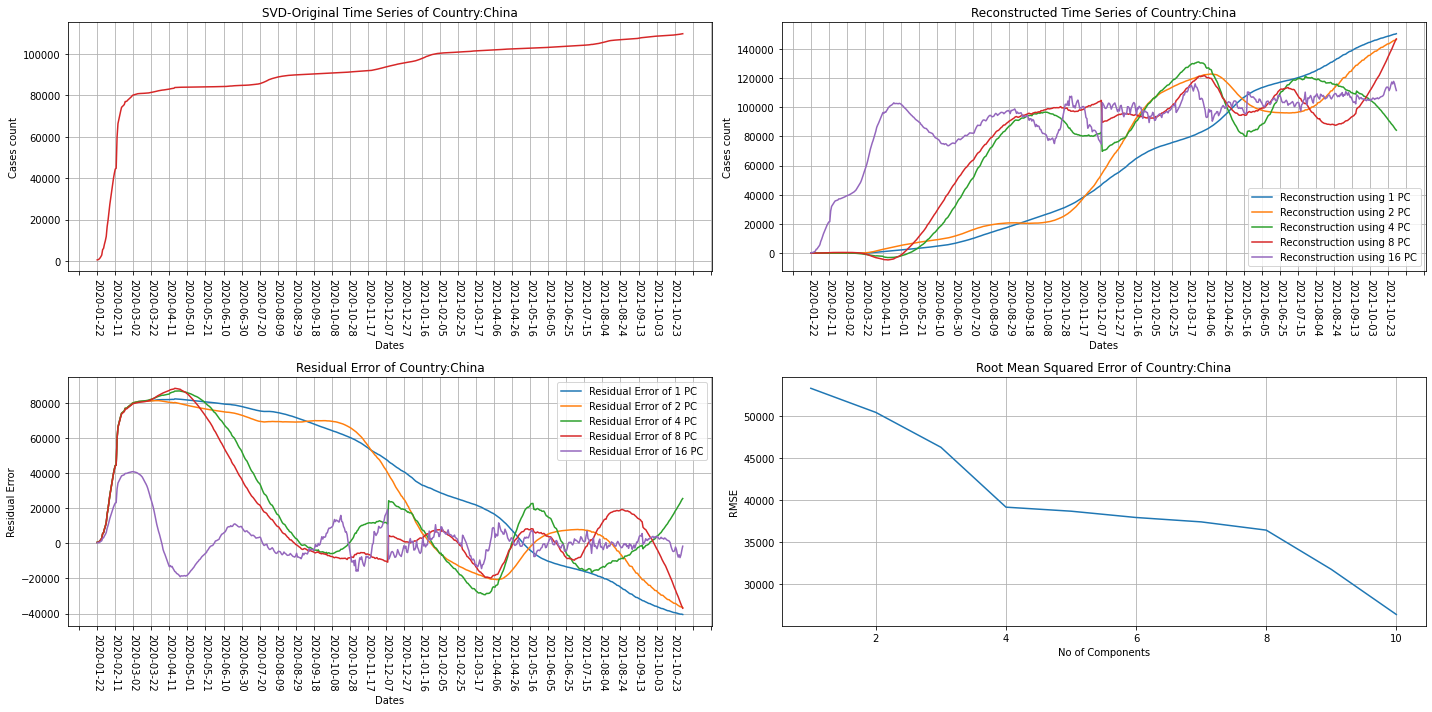

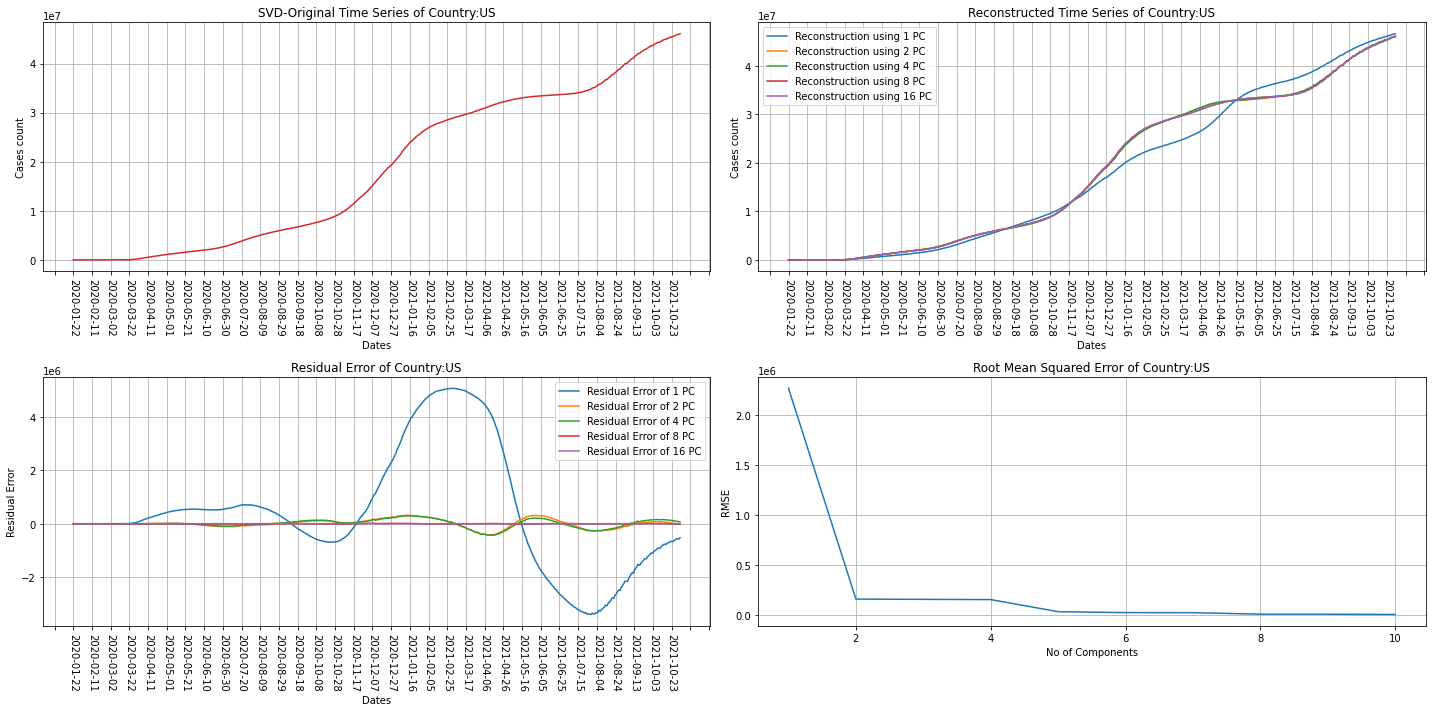

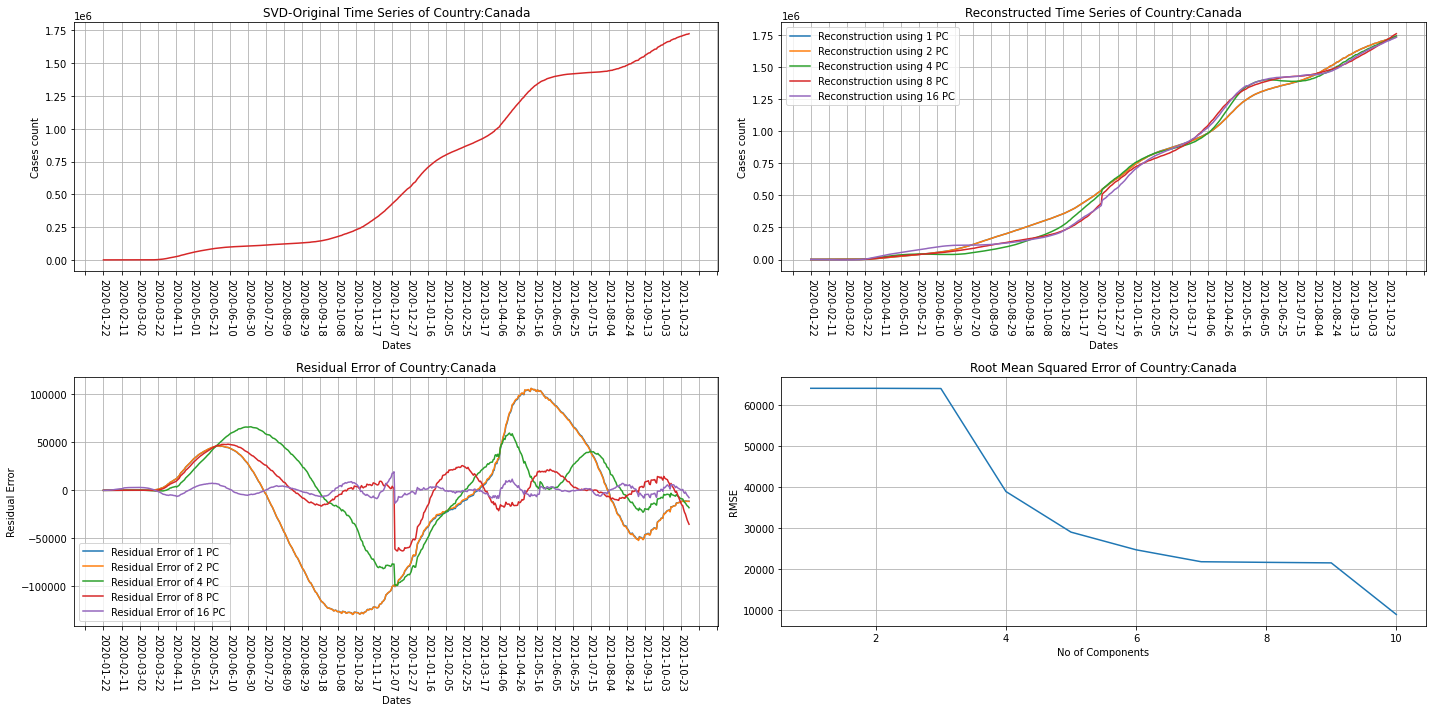

In [96]:
#Repeating Part-4 for Recent dataset
#Plotting PCA for China,US and Canada
L = plot_country_figures(d2,'China')
M = plot_country_figures(d2,'US')
N = plot_country_figures(d2,'Canada')

#Plotting SVD for China,US and Canada
H = plot_country_figures_SVD(d2,'China')
I = plot_country_figures_SVD(d2,'US')
J = plot_country_figures_SVD(d2,'Canada')


**SVD gives better performance than PCA in most of the cases,We need to set a particular number of PC to achieve maximum Reconstruction without loosing much data simultaneously achieving dimensionality reduction, which is evident from RMSE and Residual Plots**

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

